In [1]:
import numpy as np
import pandas as pd
import sys
import scipy.io
import matplotlib.pyplot as plt
from tools import * 
from utils import *

# Choose dataset and mouse

In [29]:
dataset = 'M030_2024_04_11_17_00'
mouse_id = 'M030'


# Load events data 

In [30]:
dir_to_events = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_behav/'

df_events = pd.read_csv(dir_to_events + dataset+'_events.csv')

 Subtract before camera trigger so that time 0 equals the first camera trigger :) 


In [31]:
df_events['time_shifted'] = df_events['time'] - df_events[df_events['name']=='before_camera_trigger'].time.values

replacement_dict = {'0': 300, '1': 240, '2': 180, '3': 120, '4': 60, '5': 0} 

df_events['sol_direction'] = df_events['value'].map(replacement_dict)

In [32]:
df_events.head()

,Unnamed: 0,type,name,time,duration,value,time_shifted,sol_direction
0,0,info,Experiment name,NaN,NaN,run_task,NaN,NaN
1,1,info,Task name,NaN,NaN,earthquake-long,NaN,NaN
2,2,info,Task file hash,NaN,NaN,938686995,NaN,NaN
3,3,info,Setup ID,NaN,NaN,COM9,NaN,NaN
4,4,info,Subject ID,NaN,NaN,M030_2024_04_11_17_00,NaN,NaN


In [33]:
df_events[df_events['name']=='Sol_direction']

,Unnamed: 0,type,name,time,duration,value,time_shifted,sol_direction
1137,1137,print,Sol_direction,610013.0,NaN,3,610009.0,120.0
1145,1145,print,Sol_direction,613657.0,NaN,0,613653.0,300.0
1154,1154,print,Sol_direction,618827.0,NaN,3,618823.0,120.0
1178,1178,print,Sol_direction,629827.0,NaN,1,629823.0,240.0
1190,1190,print,Sol_direction,636167.0,NaN,4,636163.0,60.0
...,...,...,...,...,...,...,...,...
7596,7596,print,Sol_direction,3571685.0,NaN,0,3571681.0,300.0
7609,7609,print,Sol_direction,3582597.0,NaN,0,3582593.0,300.0
7621,7621,print,Sol_direction,3588737.0,NaN,5,3588733.0,0.0
7625,7625,print,Sol_direction,3591147.0,NaN,2,3591143.0,180.0


# Load behaviour (joint angles and keypoints)

In [34]:
dir_to_key_points = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_pose_estimation/'
df_pose = pd.read_csv(dir_to_key_points + dataset+'_3dpts_angles.csv')

In [35]:
list_of_keypoints = ['shoulder_center', 'left_shoulder', 'right_shoulder', 'left_paw', 'right_paw', 'left_elbow', 'right_elbow', 'hip_center', 'left_knee', 'right_knee',
                     'left_ankle', 'right_ankle', 'tail_base', 'tail_middle', 'tail_tip', 'left_wrist', 'right_wrist']

In [36]:
for joint in list_of_keypoints:
    df_pose[joint+'_pos'] = df_pose.apply(lambda row: [row[joint+'_x'], row[joint+'_y'], row[joint+'_z']], axis=1)


In [37]:
df_pose.head()

,shoulder_center_x,shoulder_center_y,shoulder_center_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_paw_x,left_paw_y,left_paw_z,right_shoulder_x,...,hip_center_pos,left_knee_pos,right_knee_pos,left_ankle_pos,right_ankle_pos,tail_base_pos,tail_middle_pos,tail_tip_pos,left_wrist_pos,right_wrist_pos
0,22.438472,-12.563070,176.304964,14.883734,-5.285433,179.918816,18.217056,7.949677,180.372575,25.339992,...,"[4.660734525812127, -5.514074384971747, 147.44...","[-1.0773753861689568, 3.734055550338129, 156.3...","[16.888541898297074, 0.2285686629167264, 151.8...","[-5.159648557175953, 5.613558509088712, 147.19...","[11.751064828136736, 8.028218556265886, 151.37...","[3.0106492371667195, -0.6724851345112693, 142....","[-8.96236834619256, -7.764141597814162, 127.40...","[-8.374855700759003, -21.595157765011468, 94.9...","[16.40575804751768, 6.370276362822087, 177.771...","[24.38845974320632, 3.65970446694452, 173.6833..."
1,22.479162,-12.685833,176.334303,14.802492,-5.385494,179.553684,17.787448,8.148077,178.773330,25.262831,...,"[4.342316070920497, -5.472798903669099, 147.40...","[-1.606844599630831, 3.880908717855736, 156.12...","[16.57764538087724, 0.5414207897794377, 151.40...","[-5.777663784218345, 5.97660243120238, 147.115...","[11.04939421887658, 8.122717144212576, 150.667...","[2.530373809339192, -0.5786491163708842, 142.4...","[-9.156276128865986, -7.825238062557887, 127.3...","[-7.941929248218016, -22.318307802895944, 95.3...","[16.123533073624824, 6.738416419782286, 175.99...","[24.42627136142289, 2.8794312093071546, 175.14..."
2,22.536699,-12.765489,176.307517,14.735870,-5.539276,179.360435,17.314465,8.373970,177.253949,25.125483,...,"[3.829150524222268, -5.622635113489613, 147.40...","[-1.776060459586256, 3.681009787954301, 156.46...","[15.861144568746578, 1.0075703409526182, 150.7...","[-6.141723115653456, 5.799766592616404, 147.62...","[9.25997599380643, 7.833287284198769, 149.6834...","[2.0379256535912504, -0.6964028509999058, 142....","[-9.538492312642802, -7.996961211023988, 127.2...","[-7.6529217813846335, -22.9888574957565, 95.58...","[15.71204199629658, 6.864031369264697, 174.501...","[24.824787503564863, 2.807870803846014, 176.13..."
3,22.538444,-12.818086,176.323937,14.659918,-5.654130,179.304974,17.125875,8.541859,175.628185,24.847111,...,"[3.2537200628025054, -5.851575774998009, 147.5...","[-1.2189247582609248, 2.7166905131419656, 157....","[15.162496488753291, 1.400931165734733, 149.69...","[-5.575733241708116, 4.173019369228094, 148.72...","[7.799542612478169, 7.235180018246395, 147.957...","[1.4019152878549306, -0.98636036285707, 142.57...","[-10.09260789091193, -8.302051010102625, 127.1...","[-7.714303313294215, -23.43929869979812, 95.70...","[15.113077275815582, 6.82840782941549, 173.311...","[25.03843529654576, 2.8550189789693885, 177.13..."
4,22.455877,-12.834291,176.383604,14.409061,-5.800087,179.208046,17.068394,8.547443,173.830726,24.744682,...,"[2.5490047873704462, -5.948872515180119, 147.9...","[-0.4987837615231775, 0.9192470484287312, 159....","[14.276321892957398, 1.7404176429560438, 148.4...","[-4.133750992619704, 2.9607544484765125, 150.3...","[6.497626498187048, 6.50592909473185, 145.1267...","[0.6716539848924961, -1.0010342762310631, 143....","[-10.725856136866277, -8.3524322953955, 127.42...","[-8.32165183588614, -23.58576033905076, 95.836...","[14.74051223702274, 6.56669482538489, 172.0922...","[25.060439555142903, 3.04080303668213, 178.020..."


In [38]:
len(df_pose)

420014

# Load and process spike data

In [39]:
probe_nb = '0'
break_rec = 200
str_motor_spikes, m1_spikes = load_spike_data(mouse_id, dataset,probe_nb,break_rec)



In [40]:
m1_spikes.shape

(114, 423050)

In [41]:
probe_nb = '1'
break_rec = 220
str_sensor_spikes, s1_spikes = load_spike_data(mouse_id, dataset,probe_nb,break_rec)



In [42]:
s1_spikes.shape

(130, 423052)

# Create dataframe

Create one trial (row) for each solenoid

In [43]:
# Define bin size and window size
bin_size = 10  # 10 ms bins
window_size = 1000  # 1 second before and after event
bins_before_after = window_size // bin_size  # Number of bins before and after event

# Dictionary to store the spike data arrays
spike_data_dict = {
    'm1_spikes': m1_spikes,
    'str_motor_spikes': str_motor_spikes,
    's1_spikes': s1_spikes,
    'str_sensor_spikes': str_sensor_spikes,
}

list_of_angles = [col for col in df_pose.columns if 'angle' in col]

angles_data_dict = {}

for column in list_of_angles:
    angles_data_dict[column] = df_pose[column].values

list_of_keypoints = [col for col in df_pose.columns if '_pos' in col]

keypoints_data_dict = {}

for column in list_of_keypoints:
    #keypoints_data_dict[column] = df_pose[column].values
    keypoints_data_dict[column] = np.array(df_pose[column].values.tolist())




In [44]:
def extract_spike_trial_data(spike_data, start_bin,end_bin):
    # Ensure the indices are within bounds
    if start_bin >= 0 and end_bin <= spike_data.shape[1]:
        trial_data = spike_data[:,start_bin:end_bin]
        return trial_data.T
    else:
        return None

In [45]:
def extract_keypoints_trial_data(spike_data, start_bin,end_bin):
    # Ensure the indices are within bounds
    if start_bin >= 0 and end_bin <= spike_data.shape[0]:
        
        trial_data = spike_data[start_bin:end_bin,:]
        
        return trial_data
    else:
        return None
    
def extract_angles_trial_data(spike_data, start_bin,end_bin):
    # Ensure the indices are within bounds
    if start_bin >= 0 and end_bin <= spike_data.shape[0]:
        
        trial_data = spike_data[start_bin:end_bin]
        
        return trial_data.flatten()
    else:
        return None

In [46]:
np.array(df_pose[column].values.tolist())

array([[ 24.38845974,   3.65970447, 173.68335735],
       [ 24.42627136,   2.87943121, 175.14422279],
       [ 24.8247875 ,   2.8078708 , 176.13276539],
       ...,
       [ 22.72903598,   6.68161954, 165.83321047],
       [ 23.17629072,   5.59806105, 163.91686242],
       [ 23.92909059,   5.13465664, 163.42429653]])

In [47]:
combined = np.array(keypoints_data_dict['shoulder_center_pos'].tolist())

In [48]:
combined

array([[ 22.43847171, -12.56307023, 176.3049638 ],
       [ 22.47916152, -12.68583276, 176.3343027 ],
       [ 22.53669915, -12.76548924, 176.30751652],
       ...,
       [ 23.1432044 , -12.79724199, 175.9055417 ],
       [ 23.04417293, -12.79484199, 175.97885882],
       [ 22.92984719, -12.74302014, 176.0842306 ]])

In [49]:
# Create a dictionary to store the trial data for each spike array and variable
trial_data_dict = {key: [] for key in list(spike_data_dict.keys())+ list(angles_data_dict.keys())+ list(keypoints_data_dict.keys())}

sol_direction = df_events[df_events['name']=='Sol_direction'].time_shifted.values

##### Make the first trial the whole quiet period at the beginning 

event_time = df_events[df_events['name']=='quiet_period_end'].time_shifted.values
event_bin = event_time // bin_size  # Convert event time to bin index
start_bin = 0
end_bin = int(event_bin)

for key, spike_data in spike_data_dict.items():

    trial_data = extract_spike_trial_data(spike_data, start_bin, end_bin)
    trial_data_dict[key].append(trial_data)

for key, keypoint_data in angles_data_dict.items():

    trial_data = extract_angles_trial_data(keypoint_data, start_bin, end_bin)
    trial_data_dict[key].append(trial_data)

for key, keypoint_data in keypoints_data_dict.items():

    trial_data = extract_keypoints_trial_data(keypoint_data, start_bin, end_bin)
    trial_data_dict[key].append(trial_data)


# create one trial for each perturbation 

for event_time in sol_direction:
    event_time = event_time // 10
    event_bin = event_time // bin_size  # Convert event time to bin index
    start_bin = int(event_bin - bins_before_after)
    end_bin = int(event_bin + bins_before_after)

    for key, spike_data in spike_data_dict.items():
        if isinstance(spike_data, np.ndarray):
            trial_data = extract_spike_trial_data(spike_data, start_bin, end_bin)
        else:
            trial_data = spike_data[event_time]
        
        if trial_data is not None:
            trial_data_dict[key].append(trial_data)
    
    for key, keypoint_data in angles_data_dict.items():
        if isinstance(keypoint_data, np.ndarray):
            trial_data = extract_angles_trial_data(keypoint_data, start_bin, end_bin)
        else:
            trial_data = keypoint_data[event_time]
        
        if trial_data is not None:
            trial_data_dict[key].append(trial_data)

    for key, keypoint_data in keypoints_data_dict.items():
        if isinstance(keypoint_data, np.ndarray):
            trial_data = extract_keypoints_trial_data(keypoint_data, start_bin, end_bin)
        else:
            trial_data = keypoint_data[event_time]
        
        if trial_data is not None:
            trial_data_dict[key].append(trial_data)
    
##### Make the last trial the whole quiet period at the beginning 

event_time = df_events[df_events['name']=='quiet_period_start'].time_shifted.values
event_bin = event_time // bin_size  # Convert event time to bin index
start_bin = int(event_bin)
end_bin = int(df_events[df_events['name']=='session_timer'].time_shifted.values // bin_size )

for key, spike_data in spike_data_dict.items():

    trial_data = extract_spike_trial_data(spike_data, start_bin, end_bin)
    trial_data_dict[key].append(trial_data)

for key, keypoint_data in angles_data_dict.items():

    trial_data = extract_angles_trial_data(keypoint_data, start_bin, end_bin)
    trial_data_dict[key].append(trial_data)

for key, keypoint_data in keypoints_data_dict.items():

    trial_data = extract_keypoints_trial_data(keypoint_data, start_bin, end_bin)
    trial_data_dict[key].append(trial_data)




# Create a DataFrame where each row is a trial, with separate columns for each spike array and variable

df_trials = pd.DataFrame({'trial_id':range(len(sol_direction) + 2),'event_time':[np.nan] + list(sol_direction) + [np.nan]})

df_trials['sol_nb'] = [np.nan] + list(df_events[df_events['name']=='Sol_direction'].value.values) + [np.nan]

df_trials['sol_direction'] = [np.nan] + list(df_events[df_events['name']=='Sol_direction'].sol_direction.values) + [np.nan]

df_trials['perturbation_bin'] = [np.nan] + list(np.ones(len(sol_direction))*100) + [np.nan]

df_trials['trialType']= 'perturbation'

df_trials.loc[[0,len(df_trials)-1],'trialType'] = 'spontaneous' # first and last trials are quiet period

for key in trial_data_dict.keys():
    df_trials[key] = trial_data_dict[key]




/tmp/ipykernel_888879/3022811579.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_bin = int(event_bin)
/tmp/ipykernel_888879/3022811579.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_bin = int(event_bin)
/tmp/ipykernel_888879/3022811579.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_bin = int(df_events[df_events['name']=='session_timer'].time_shifted.values // bin_size )


In [50]:
event_bin

array([359999.])

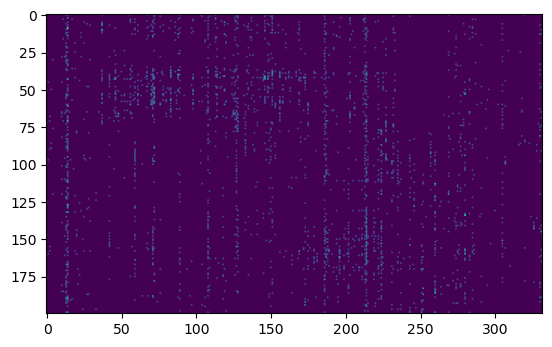

In [51]:
plt.imshow(df_trials.str_sensor_spikes[4])

# Save files 

In [52]:
df_trials.to_csv('/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_pyaldata.csv')

In [53]:
#data_dict = {col: df_trials[col].values for col in df_trials.columns}

data_array = df_trials.to_records(index=False)

#data_dict = {'df': df_trials.to_dict('list')}

# Save the dictionary to a .mat file
#file_path = 'data.mat'
#scipy.io.savemat(file_path, data_dict)

In [54]:
#scipy.io.savemat('/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_pyaldata.mat', data_dict)

scipy.io.savemat('/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_pyaldata.mat', {'df': data_array})